## 1a



La función del modelo es:
$$
\hat{y}(x, w) = \sum_{j=0}^{M} w_j \cdot \phi_j(x)
$$
Considerando $\phi_j(x) = x^j$.

**Ruido**
$$
y = \hat{y}(x, w) + \epsilon
$$
con $\epsilon \sim N(0, \sigma^2)$.



$$
P(y|x, w) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{1}{2 \sigma^2} (y - g(x, w))^2 \right)
$$

**Maxima verosimilitud**
La función de verosimilitud (likelihood) es:
$$
L(w) = \max_{w} \prod_{n=1}^{N} P(y_n | x_n, w)
$$
Que es equivalente a:
$$
- \log L(w) = \min_{w} - \sum_{n=1}^{N} -\frac{1}{2} \log(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} (y_n - \hat{y}(x_n, w))^2
$$


$$
-\log L(w) = \min_{w} \frac{N}{2} \log(2 \pi \sigma^2) + \sum_{n=1}^{N} \frac{1}{2 \sigma^2} (y_n - \hat{y}(x_n, w))^2
$$

Calculamos el gradiente para encontrar el minimo:
$$
\nabla_w L(w) = -\frac{1}{\sigma^2} \sum_{n=1}^{N} (y_n - \hat{y}(x_n, w)) \nabla_w \hat{y}(x_n, w) \\
= \frac{1}{\sigma^2} \sum_{n=1}^{N} (y_n - g(x_n, w)) \phi(x_n) = 0
$$

De forma matricial queda:
$$
\Phi^T \Phi w = \Phi^T y
$$
y despejamos w:
$$
w = (\Phi^T \Phi)^{-1} \Phi^T y
$$


**Solución óptima global**
Para ver si es optimo global vemos si es convexo:
$$
\nabla_w L(w) = \frac{1}{\sigma^2} \Phi^T (\Phi w - y) = 0
$$
$$
H(w) = \nabla^2_w L(w) = \frac{1}{\sigma^2} \Phi^T \Phi = \frac{1}{\sigma^2} Q^T Q
$$
$\Phi^T \Phi$ es definida positiva y $\sigma^2 > 0$.

Por lo tanto, $L(w)$ es convexo y tiene minimo global.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random


# el error se mide con el set de validacion


def dataset():
    random.seed(32)
    with open('datasets/toy_dataset.pkl', 'rb') as file:
        data =  pickle.load(file)
    data_ = list(zip(data['input_feature'], data['taret']))
    random.shuffle(data_)
    print(data_[0])
    print(data_[1])
    x, y = zip(*data_)
    
    x_train = np.array(x[:int(0.8 * len(data))])
    y_train = np.array(y[:int(0.8 * len(data))])
    x_val = np.array(x[int(0.8 * len(data)):])
    y_val = np.array(y[int(0.8 * len(data)):])
    
    data_train = {'input_feature': x_train, 'taret' :y_train}
    data_val =  {'input_feature': x_val, 'taret' :y_val}
    return data_train, data_val

def design_matrix(X, m):
    matrix = np.zeros((len(X), m+1))
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j] = X[i]**j
    return matrix

def plot_data(data, w):
    y_ = 0
    x_ = np.linspace(-1, 1, 1000)
    plt.plot(data['input_feature'], data['taret'], 'o')
    for i in range(len(w)):
        y_ += w[i] * (x_**i)
    plt.plot(x_, y_)
    plt.title(f"polinomio grado {len(w)-1}")
    plt.show()

def train(data, m):
    matrix = design_matrix(data['input_feature'], m)
    matrix_t = np.transpose(matrix)      
    w_opt = np.linalg.pinv(matrix_t @ matrix) @ matrix_t @ data['taret']
    return w_opt

def rmse(data, w):
    evaluation = 0
    for i in range(len(w)):
        evaluation += w[i] * (data['input_feature']**i)
    err = np.sqrt(np.mean((data['taret'] - evaluation)**2))
    return err

def error(data, ws, set):
    errors = []
    for i in range(len(ws)):
        errors.append(rmse(data, ws[i]))
    
    """plt.plot(range(len(ws)), errors)
    plt.title(f"{set} set error")
    plt.xlabel("M")
    plt.ylabel("RMSE")
    plt.show()"""
    
    return errors
    

def model(data_train, M):
    ws = []
    for m in range(M):
        w_opt = train(data_train, m)
        ws.append(w_opt)
        #plot_data(data_train, w_opt)
    return ws

def main():
    M = 20
    data_train, data_val = dataset()
    ws = model(data_train, M)
    train_errors = error(data_train, ws, 'train')
    val_errors = error(data_val, ws, 'validation')
    plt.plot(range(len(ws)), train_errors, label='train set')
    plt.plot(range(len(ws)), val_errors, label='validation set')
    plt.title(f"RMSE error")
    plt.legend()
    plt.xlabel("M")
    plt.ylabel("RMSE")
    plt.show()

main()
        


## 1C 


 En este caso:
$$ P(W) = \sim N(w0, s^2 I)$$
$$ \hat{y}(x, w) = \sum_{j=0}^{M} w_j \phi_j(x) $$
donde $ \phi_j(x) = x^j $ y se asume que $ w0 $ es un vector constante.

Entonces, planteamos la conjunta entre $ P(Y|X) $ y $ P(W) $ (independientes):
$$ P(Y|X,W) = \prod_{n=1}^{N} \mathcal{N}(y_n|\hat{y}(x_n, W), \sigma^2) $$

La función de verosimilitud $ L(W) $:
$$ L(W) = \prod_{n=1}^{N} P(y_n|x_n, W) P(W) $$
$$ L(W) = \frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}} \exp \left( -\frac{1}{2\sigma^2} \sum_{n=1}^{N} (y_n - \hat{y}(x_n, W))^2 \right) $$
$$ L(W) = \prod_{n=1}^n \frac{1}{(2\pi s^2)^{\frac{1}{2}}} \exp \left( -\frac{1}{2s^2}  (y_n - \hat{y}(x_n, W))^2 \right ) \frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}} \exp \left( -\frac{1}{2\sigma^2} ((W - w0)^T (W - w0)) \right)$$
El  - logaritmo de $ L(W) $ es:
$$ -\log L(W) = [\frac{N}{2} \log(2\pi s^2) + \frac{1}{2s^2} \sum_{n=1}^{N} (y_n - \hat{y}(x_n, W))^2 ] + \frac{M}{2} \log(2\pi \sigma^2) + \frac{1}{2\sigma^2} ((W - w0)^T (W - w0))$$

Buscamos minimizar:
$$ \nabla_W -\log L(W) = -\frac{1}{2s^2}  \left[ \sum_{n=1}^{N} (y_n - \hat{y}(x_n, W))^2 \right] \phi(x) + \frac{1}{\sigma^2} (W - w0) = 0$$
$$ = -\frac{1}{2\sigma^2} \nabla_W \left[ \sum_{n=1}^{N} (y_n - \Phi_n W)^2 \right] $$
$$ = -\frac{1}{s^2} \Phi^T Y + \frac{1}{s^2I} \Phi^T \Phi W = \frac{1}{\sigma^2}(W - w0) $$
$$ (\Phi^T \Phi + \frac{s^2}{\sigma^2} I) W = \Phi^T Y + \frac{s^2}{\sigma^2} w0 $$
$$ W = \left( \Phi^T \Phi + \frac{s^2}{\sigma^2} I \right)^{-1} (\Phi^T Y + \frac{s^2}{\sigma^2} w0)$$


(-0.7102102558175538, 1.9083717423444329)
(0.815132947852186, 1.6402734922556534)


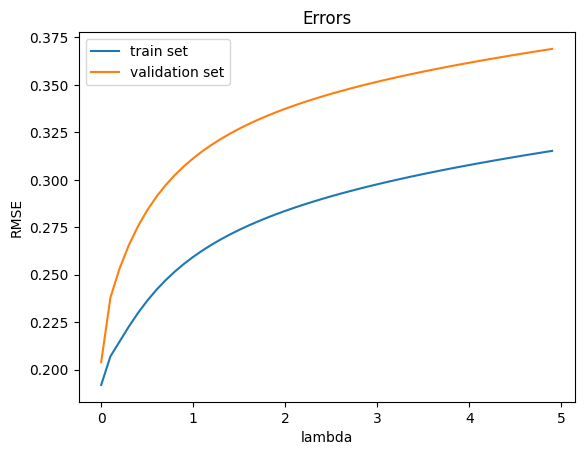

lambda:  0.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

def dataset():
    random.seed(32)
    with open('datasets/toy_dataset.pkl', 'rb') as file:
        data =  pickle.load(file)
    data_ = list(zip(data['input_feature'], data['taret']))
    random.shuffle(data_)
    print(data_[0])
    print(data_[1])
    x, y = zip(*data_)
    
    x_train = np.array(x[:int(0.8 * len(data))])
    y_train = np.array(y[:int(0.8 * len(data))])
    x_val = np.array(x[int(0.8 * len(data)):])
    y_val = np.array(y[int(0.8 * len(data)):])
    
    data_train = {'input_feature': x_train, 'taret' :y_train}
    data_val =  {'input_feature': x_val, 'taret' :y_val}
    return data_train, data_val

def design_matrix(X, m):
    matrix = np.zeros((len(X), m+1))
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            matrix[i][j] = X[i]**j
    return matrix

def plot_data(data, w, l):
    y_ = 0
    x_ = np.linspace(-1, 1, 1000)
    plt.plot(data['input_feature'], data['taret'], 'o')
    for i in range(len(w)):
        y_ += w[i] * (x_**i)
    plt.plot(x_, y_)
    plt.title(f"regresion polinomio grado 20 con lambda = {l}")
    plt.show()

def train(data, m, l):
    w0 = np.zeros((m+1, 1))
    d = np.zeros((len(data['taret']), 1))
    for i in range(len(data['taret'])):
        d[i][0] = data['taret'][i]
    matrix = design_matrix(data['input_feature'], m)
    matrix_t = np.transpose(matrix)    
    w_opt = np.linalg.pinv((matrix_t @ matrix) + (l * np.eye(m+1))) @ ((matrix_t @ d) +( l * w0))
    return w_opt

def rmse(data, w):
    evaluation = 0
    for i in range(len(w)):
        evaluation += w[i] * (data['input_feature']**i)
    err = np.sqrt(np.mean((data['taret'] - evaluation)**2))
    return err

def error(data, w, lambda_, set):
    errors = []
    for l in range(len(lambda_)):
        errors.append(rmse(data, w[l]))
    """plt.plot(lambda_, errors)
    plt.title(f"{set} set error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.show()"""
    
    return errors
    

def model(data_train, M, lambda_):
    ws = []
    for l in lambda_:
        w_opt = train(data_train, M, l)
        ws.append(w_opt)
        #plot_data(data_train, w_opt, l) descomentar 
    return ws

def main():
    M = 20
    lambda_ = np.arange(0, 5, 0.1)

    data_train, data_val = dataset()
    ws = model(data_train, M, lambda_)
    train_errors = error(data_train, ws, lambda_, 'train')
    val_errors = error(data_val, ws, lambda_, 'validation')
    plt.plot(lambda_, train_errors, label='train set')
    plt.plot(lambda_, val_errors, label='validation set')
    plt.legend()
    plt.title("Errors")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.show()
    print("lambda: ", lambda_[np.argmin(val_errors)])


main()
        
